In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## The purpose of this work is to predict binding energy between chitosan and collagen type II

In [188]:
df = pd.read_csv('./Files/All_interactions.csv')
df = df.drop(columns='id')

In [189]:
df.describe()

,DD,HD,Variant_HD,Variant_DD,Position,Hydrogen Bonds_ALA,Hydrogen Bonds_ARG,Hydrogen Bonds_GLN,Hydrogen Bonds_GLU,Hydrogen Bonds_GLY,...,Ionic Interactions_PRO,Hydrophobic Interactions_ALA,Hydrophobic Interactions_ARG,Hydrophobic Interactions_GLN,Hydrophobic Interactions_GLU,Hydrophobic Interactions_GLY,Hydrophobic Interactions_HYP,Hydrophobic Interactions_LEU,Hydrophobic Interactions_PRO,Binding_Energy
count,38314.000000,38314.000000,38314.000000,38314.000000,38314.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,...,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,38313.000000,37836.000000
mean,0.516143,0.514458,2.767500,2.938665,21.186955,0.536100,0.349733,0.386833,0.453987,0.822495,...,0.000331,0.154923,0.141793,0.040745,0.112003,0.047002,0.384473,0.177948,0.636981,-296.496320
std,0.258676,0.292259,1.422686,1.432841,12.046487,0.550967,0.459683,0.497434,0.523676,0.725287,...,0.015748,0.211552,0.226192,0.108114,0.191295,0.094760,0.401581,0.261759,0.647696,114.312392
min,0.125000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-790.240000
25%,0.250000,0.290000,1.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.100000,-372.187500
50%,0.500000,0.570000,3.000000,3.000000,21.000000,0.450000,0.100000,0.030000,0.230000,0.810000,...,0.000000,0.060000,0.030000,0.000000,0.000000,0.000000,0.290000,0.030000,0.450000,-291.500000
75%,0.750000,0.710000,4.000000,4.000000,31.000000,0.940000,0.680000,0.810000,0.900000,1.190000,...,0.000000,0.260000,0.190000,0.000000,0.160000,0.060000,0.580000,0.290000,1.000000,-215.397500
max,1.000000,1.000000,5.000000,5.000000,48.000000,3.450000,2.970000,2.970000,2.940000,4.740000,...,1.000000,1.900000,2.740000,1.320000,2.190000,1.130000,3.650000,2.520000,5.480000,359.680000


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38314 entries, 0 to 38313
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DD                            38314 non-null  float64
 1   HD                            38314 non-null  float64
 2   Variant_HD                    38314 non-null  int64  
 3   Variant_DD                    38314 non-null  int64  
 4   Position                      38314 non-null  int64  
 5   Hydrogen Bonds_ALA            38313 non-null  float64
 6   Hydrogen Bonds_ARG            38313 non-null  float64
 7   Hydrogen Bonds_GLN            38313 non-null  float64
 8   Hydrogen Bonds_GLU            38313 non-null  float64
 9   Hydrogen Bonds_GLY            38313 non-null  float64
 10  Hydrogen Bonds_HYP            38313 non-null  float64
 11  Hydrogen Bonds_LEU            38313 non-null  float64
 12  Hydrogen Bonds_PRO            38313 non-null  float64
 13  I

In [191]:
df = df.dropna(axis=0,how='any')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37835 entries, 0 to 38312
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DD                            37835 non-null  float64
 1   HD                            37835 non-null  float64
 2   Variant_HD                    37835 non-null  int64  
 3   Variant_DD                    37835 non-null  int64  
 4   Position                      37835 non-null  int64  
 5   Hydrogen Bonds_ALA            37835 non-null  float64
 6   Hydrogen Bonds_ARG            37835 non-null  float64
 7   Hydrogen Bonds_GLN            37835 non-null  float64
 8   Hydrogen Bonds_GLU            37835 non-null  float64
 9   Hydrogen Bonds_GLY            37835 non-null  float64
 10  Hydrogen Bonds_HYP            37835 non-null  float64
 11  Hydrogen Bonds_LEU            37835 non-null  float64
 12  Hydrogen Bonds_PRO            37835 non-null  float64
 13  Ionic 

In [193]:
df.isnull().values.any()

False

In [194]:
df = df.loc[:, (df != 0).any(axis=0)]

In [195]:
#df = df.query('HD==0.43')

In [196]:
x = df.drop(columns='Binding_Energy')
y = df['Binding_Energy']

<Axes: title={'center': 'Correlated with Exited'}>

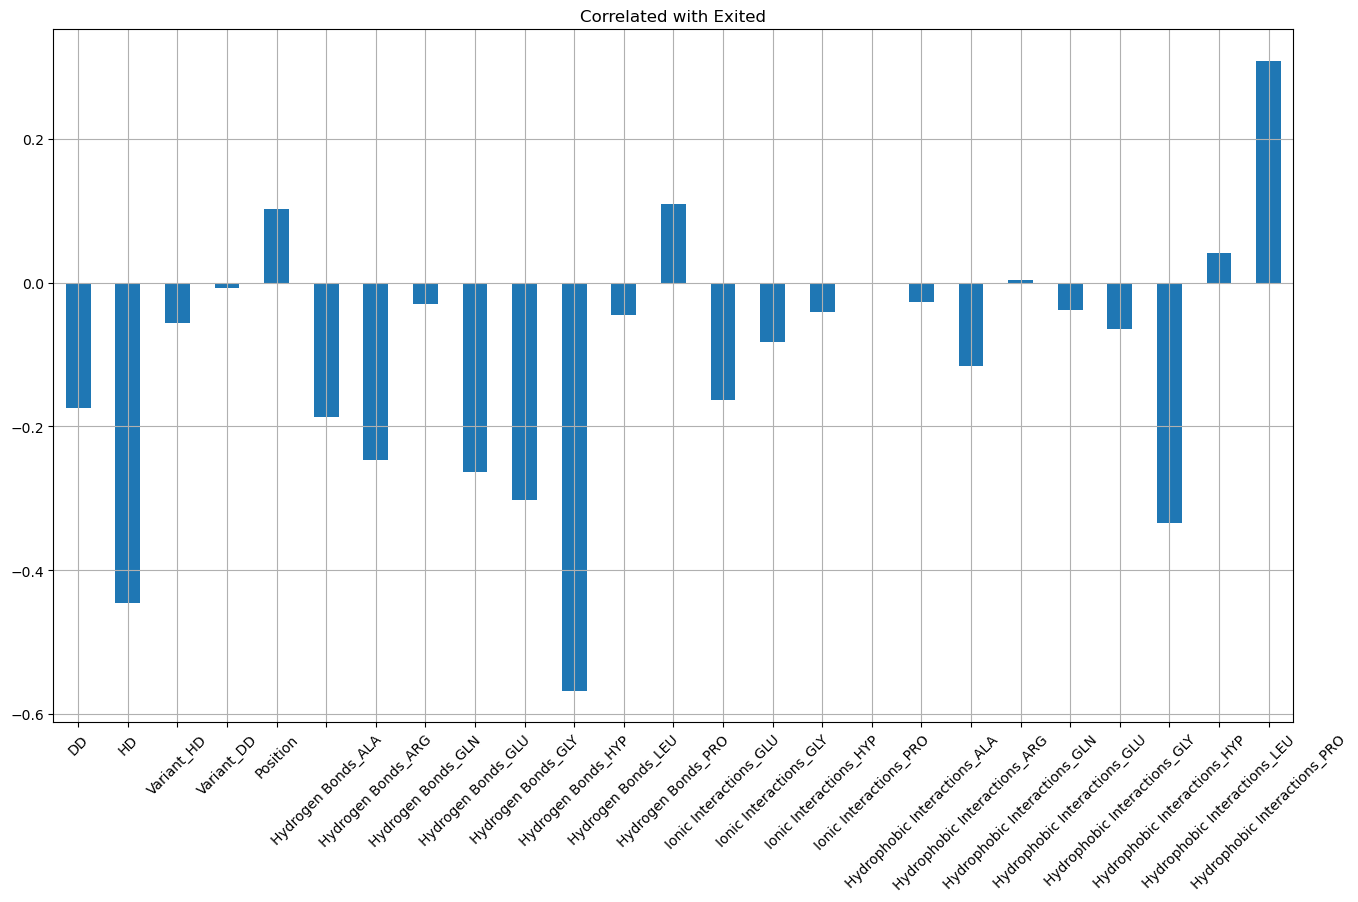

In [197]:
x.corrwith(y).plot.bar(figsize=(16,9), title='Correlated with Exited', rot=45, grid=True)

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)

(30268, 25)


# Building a model

In [199]:
from sklearn.linear_model import LinearRegression
classifier_lr = LinearRegression()
reg = classifier_lr.fit(x_train, y_train)

In [200]:
reg.score(x_train, y_train)

0.6781130667490525